<a href="https://colab.research.google.com/github/NilbertoFreitas/Mineracao_de_Dados/blob/main/BIG_A5_Clustering-Nilberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [468]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv', index_col=0)
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [469]:
print(df.isnull().sum())
df.describe()

Agr    0
Min    0
Man    0
PS     0
Con    0
SI     0
Fin    0
SPS    0
TC     0
dtype: int64


,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [470]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:1]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226]])

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



[171.65420282801458, 123.51842886605988, 103.14335133534223, 84.35602618981213, 74.53330591942512, 60.747210664433936, 51.92989584469514, 46.62557939938466, 39.38575229950912]


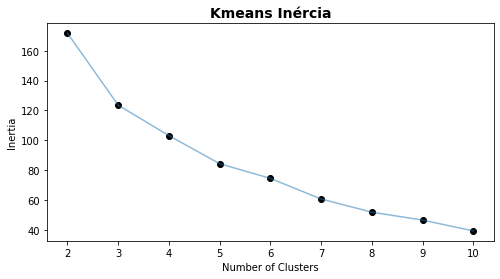

In [471]:
def inercia(X=X, kmin=2, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(kmin , kmax+1) , inertia , 'ko')
  plt.plot(np.arange(kmin , kmax+1) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,2,10)
print(inertia)
plt.show()

In [472]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 10, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

optimal_number_of_clusters(inertia)

5

In [473]:
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [474]:
from sklearn.cluster import AgglomerativeClustering

#clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
#clf = AgglomerativeClustering(n_clusters=2)  # Complete
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

silhouette_avg = silhouette_score(X, labels)
print(f'O valor médio da silhueta é  : {silhouette_avg:.3f}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
O valor médio da silhueta é  : 0.461


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



In [475]:
df['Cluster'] = labels
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0


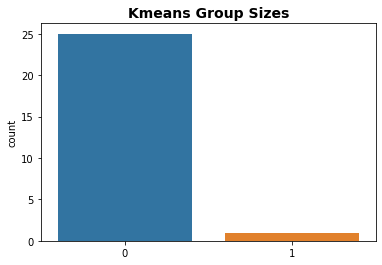

Country
Belgium           0
Denmark           0
France            0
W. Germany        0
Ireland           0
Italy             0
Luxembourg        0
Netherlands       0
United Kingdom    0
Austria           0
Finland           0
Greece            0
Norway            0
Portugal          0
Spain             0
Sweden            0
Switzerland       0
Turkey            1
Bulgaria          0
Czechoslovakia    0
E. Germany        0
Hungary           0
Poland            0
Rumania           0
USSR              0
Yugoslavia        0
Name: Cluster, dtype: int64


In [476]:
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()
print(df.Cluster)

In [477]:
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,17.224,1.276,27.772,0.94,8.38,13.268,4.116,20.348,6.68
1,66.800,0.700,7.900,0.10,2.80,5.200,1.100,11.900,3.20


## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [480]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [481]:
from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_

In [478]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=3)  

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1]


In [482]:
df['Cluster'] = labels
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0


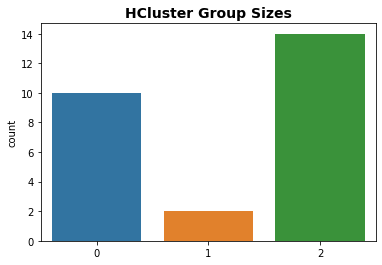

Country
Belgium           2
Denmark           2
France            2
W. Germany        2
Ireland           2
Italy             2
Luxembourg        2
Netherlands       2
United Kingdom    2
Austria           2
Finland           2
Greece            0
Norway            2
Portugal          0
Spain             0
Sweden            2
Switzerland       2
Turkey            1
Bulgaria          0
Czechoslovakia    0
E. Germany        0
Hungary           0
Poland            0
Rumania           0
USSR              0
Yugoslavia        1
Name: Cluster, dtype: int64


In [ ]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()
print(df.Cluster)

In [ ]:
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,24.760000,1.85,29.080000,0.900000,8.670000,9.180000,2.000000,16.630000,6.92
1,57.750000,1.10,12.350000,0.600000,3.850000,5.800000,6.200000,8.600000,3.60
2,9.592857,0.85,27.621429,0.957143,8.421429,16.678571,5.114286,24.078571,6.70


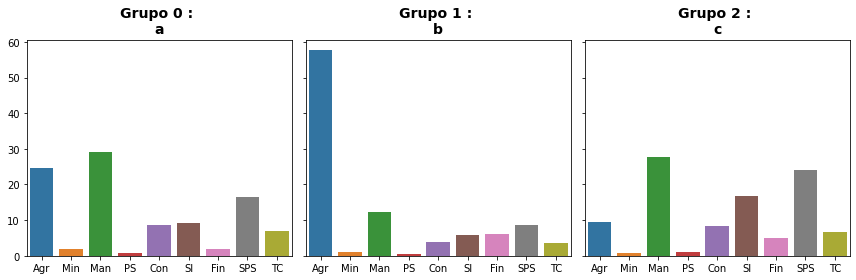

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


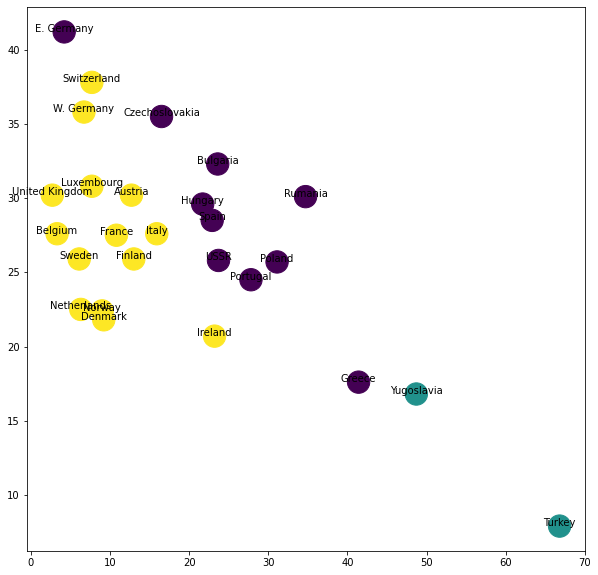

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Agr' ,y = 'Man' , data = df , c = df.Cluster , s = 500 )

for line in range(0,df.shape[0]):
     plt.text(df.Agr[line], df.Man[line], df.index[line], 
              horizontalalignment='center', 
              size='medium', 
              color='black')
plt.show()